# Classification sur MNIST avec un reseau de neuronnes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
%matplotlib inline

Using TensorFlow backend.


Nous commençons par charger les données MNIST. À la différence d’avant, nous n’utiliserons pas scikitlearn pour le faire, mais la bibliothèque Keras. C'est parce que nous allons passer des méthodes "classiques" à ce que l'on appelle "l'apprentissage en profondeur", c'est-à-dire l'apprentissage automatique à l'aide de réseaux de neurones profonds.

Keras s’appuie sur Tensorflow, un framework d’apprentissage en profondeur développé par Google et probablement le plus utilisé par les praticiens (PyTorch, développé sur Facebook, est une alternative qui gagne du terrain.)

no. of training/test samples: 60000, 10000
no. of features: 784


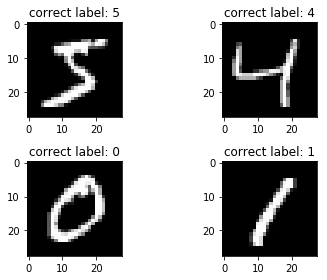

In [2]:
# Download the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("no. of training/test samples: %d, %d" % (X_train.shape[0], X_test.shape[0]))
print("no. of features: %d" % (np.product(X_train.shape[1:])))

# Let us look at some of the digits
fig, axs = plt.subplots(2, 2)
for d in range(4):
    axs[d % 2, d // 2].imshow(X_train[d], cmap="gray")
    axs[d % 2, d // 2].set_title("correct label: %d" % (y_train[d]))
fig.tight_layout()

Notez que Keras charge MNIST de manière légèrement différente de scikitlearn: les données sont déjà mélangées et divisées dans des ensembles d’entraînement / test; de plus, chaque échantillon est un tableau 2D de dimension 28x28, au lieu d’un tableau 1D de dimension 784.

Nous procédons par un prétraitement. Nous allons * rasteriser * ces vecteurs, c'est-à-dire les transformer de tableaux bidimensionnels en tableaux unidimensionnels; de plus, nous les normaliserons, de sorte que chaque composant du tableau ait une valeur comprise entre 0 et 1, au lieu de 0 et 255.

In [3]:
# Rasterize and normalize samples
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

X_train = X_train / 255
X_test = X_test / 255

# Use 32-bit instead of 64-bit float
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Work with one-hot encoding of labels
n_classes = len(np.unique(y_train))
y_train_b = keras.utils.to_categorical(y_train, n_classes)
y_test_b = keras.utils.to_categorical(y_test, n_classes)

print("The categories of the images above is now encoded as: \n", y_train_b[0:4])

The categories of the images above is now encoded as: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Il est maintenant temps de construire notre réseau de neurones multicouches. Nous allons d'abord le faire avec une seule couche cachée.

Dans le code ci-dessous, nous pouvons voir à quel point il est facile de configurer des modèles dans Keras. En quelques lignes, nous avons construit un réseau de neurones à 2 couches, et généraliser à partir de celle-ci en plusieurs couches est assez simple.

In [4]:
# Specify model
model = Sequential()
model.add(Dense(512, activation="relu", input_shape=(784,)))
model.add(Dense(n_classes, activation="softmax"))

# Print model and compile it
model.summary()
model.compile(loss="categorical_crossentropy",
              optimizer=RMSprop(),
              metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Notez que la première couche dense a $ 784 \times 512 + 512 $ paramètres, la seconde en a $ 512 \times 10 + 10 $. Ils correspondent aux poids, plus un biais appliqué à chaque sortie. Nous compilons le modèle en utilisant l'entropie croisée comme fonction de cout (l'equivalent de la regression logistique) et nous utiliserons l'algorithme d'optimisation RMSprop décrit [ici] (http://ruder.io/optimizing-gradient-descent/index.html#rmsprop) ainsi que d'autres variantes de descente de gradient. .

Après avoir configuré le modèle, nous pouvons l'entrainer comme dans scikitlearn: en utilisant `model.fit (X_train, y_train)`.

In [5]:
# Parameters
batch_size = 128
epochs = 20

# Perform fit
history = model.fit(X_train, y_train_b,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=False,
                    validation_data=(X_test, y_test_b))


# Print results
score = model.evaluate(X_test, y_test_b, verbose=0)
print('Test loss/accuracy: %g, %g' % (score[0], score[1]))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.2568 - acc: 0.9255 - val_loss: 0.1665 - val_acc: 0.9458
Epoch 2/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.1075 - acc: 0.9687 - val_loss: 0.1130 - val_acc: 0.9649
Epoch 3/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0705 - acc: 0.9795 - val_loss: 0.0927 - val_acc: 0.9714
Epoch 4/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.0508 - acc: 0.9855 - val_loss: 0.0877 - val_acc: 0.9742
Epoch 5/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0377 - acc: 0.9896 - val_loss: 0.0874 - val_acc: 0.9753
Epoch 6/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0279 - acc: 0.9927 - val_loss: 0.0872 - val_acc: 0.9753
Epoch 7/20
60000/60000 [==============================] - 4s 69us/step - loss: 0

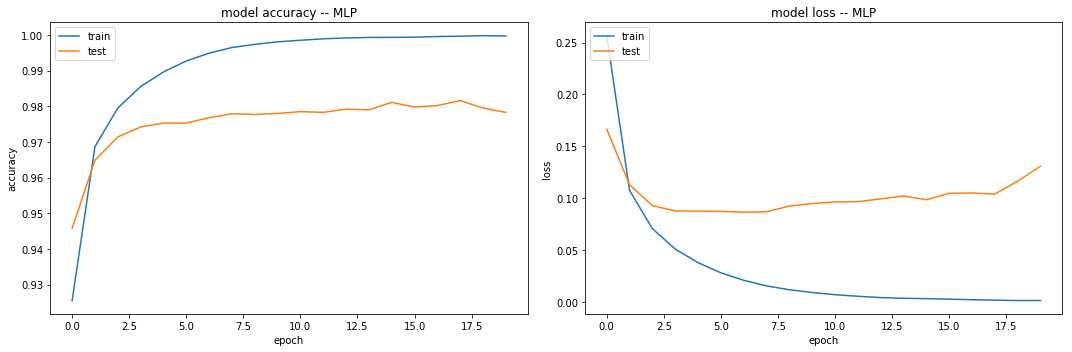

In [6]:
plt.figure(figsize=(15, 5)) 
# Plot history for accuracy
plt.subplot(121)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy -- MLP')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss -- MLP')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()

C’est en fait assez bon, une précision de 2% representait l’état de l'art pendant une longue periode (vérifiez-le [ici] (http://yann.lecun.com/exdb/mnist/)), meme si l'on peut faire bien mieux maintenant, comme nous le verrons plus tard. Juste par curiosité, vous trouverez [ici] (http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html) est une liste détaillée des meilleurs résultats que les utilisateurs ont pu obtenir sur MNIST. La plus petite erreur de test obtenue jusqu’à présent est de 0,21%, c’est-à-dire que seulement 21 des 10 000 échantillons de test ne sont pas classés correctement!

## Jouer avec notre reseau de neuronnes

Il existe de nombreux degrés de liberté dans notre modèle et dans la procédure de formation, qui ont été choisis de manière plus ou moins arbitraire. Par exemple, pourquoi utilisons-nous ces valeurs pour 'batch_size' et 'epochs'? Pourquoi utilisons-nous une activation ReLU sur la 1ère couche et une activation softmax sur la seconde? Pourquoi utilisons-nous cette perte, cet optimiseur, etc.

C’est l’un des principaux problèmes de l’apprentissage en profondeur: en principe, on ne sait pas quelle approche donnera les meilleurs résultats, et de nombreuses approches sont possibles. Il faut donc essayer beaucoup de choses et voir ce qui se passe.
Nous pouvons procéder à une validation croisée, mais les possibilités sont tellement nombreuses que tout essayer n'est tout simplement pas réalisable.

Nous avons donc besoin de développer un instinct sur ce qui convient le mieux à chaque situation - parfois, la théorie peut nous guider, parfois non.
Nous allons maintenant voir comment les choses changent si nous ajoutons l'abandon et la normalisation des lots, prenons un réseau plus superficiel ou ajoutons une deuxième couche. Il semble toutefois difficile de trop améliorer la performance de 2% avec cette approche.

###  dropout & batch normalization

En regardant les chiffres imprimés à l'écran pendant la formation, on s'aperçoit que notre modèle surajustait beaucoup: nous obtenons essentiellement une précision de 100% sur l'ensemble de formation!

Certaines astuces ont été introduites pour gérer ce surajustement. Le premier d'entre eux s'appelle * dropout * (introduit [ici] (https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf)), et consiste, à chaque étape de la procédure de formation , en ignorant certaines des fonctionnalités. C’est plus ou moins ce que nous avons fait lorsque nous avons examiné des forêts aléatoires: chacun des arbres de la forêt utilisait un sous-ensemble de caractéristiques. On peut donc voir le décrochage comme une sorte de procédure d’ensachage qui rend le modèle plus robuste. La différence est que la suppression peut être appliquée à chaque couche, pas seulement à la première couche en entrée.

L’autre astuce est la * normalisation par batch *, qui consiste à prélever chaque échantillon dans un mini-lot et à le standardiser à l’aide de la moyenne et de la variance * mini-batch *, voir [ici] (https://arxiv.org/pdf/1502.03167 .pdf) pour plus de détails.

Ces astuces ont été introduites principalement de manière ad-hoc - les gens ont quelques explications sur les raisons pour lesquelles ils fonctionnent et ont essayé de faire de la théorie à ce sujet, mais au final, nous ne comprenons toujours pas vraiment pourquoi et quand ils fonctionnent ( voir [le discours provocateur d'Ali Rahimi] (https://www.youtube.com/watch?v=Qi1Yry33TQE)).

In [7]:
from keras.layers import Dropout, BatchNormalization, Activation

# Parameters
batch_size = 128
epochs = 20

# Specify model
model = Sequential()

model.add(Dense(512, input_dim=784, init="uniform"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))

model.add(Dense(n_classes, init="uniform"))
model.add(BatchNormalization())
model.add(Activation("softmax"))

# Print model and compile it
model.summary()
model.compile(loss="categorical_crossentropy",
              optimizer=RMSprop(),
              metrics=["accuracy"])

# Perform fit
history_dropout = model.fit(X_train, y_train_b,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test_b))


# Print results
score = model.evaluate(X_test, y_test_b, verbose=0)
print('Test loss/accuracy: %g, %g' % (score[0], score[1]))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=784, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                40        
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total para

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.4502 - acc: 0.9385 - val_loss: 0.2465 - val_acc: 0.9680
Epoch 2/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.2207 - acc: 0.9679 - val_loss: 0.1416 - val_acc: 0.9751
Epoch 3/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.1411 - acc: 0.9754 - val_loss: 0.1043 - val_acc: 0.9790
Epoch 4/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.1002 - acc: 0.9805 - val_loss: 0.0854 - val_acc: 0.9801
Epoch 5/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0794 - acc: 0.9828 - val_loss: 0.0724 - val_acc: 0.9814
Epoch 6/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.0652 - acc: 0.9863 - val_loss: 0.0673 - val_acc: 0.9798
Epoch 7/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0542 - acc: 0.9880 - val_loss: 0.0645 - val_acc

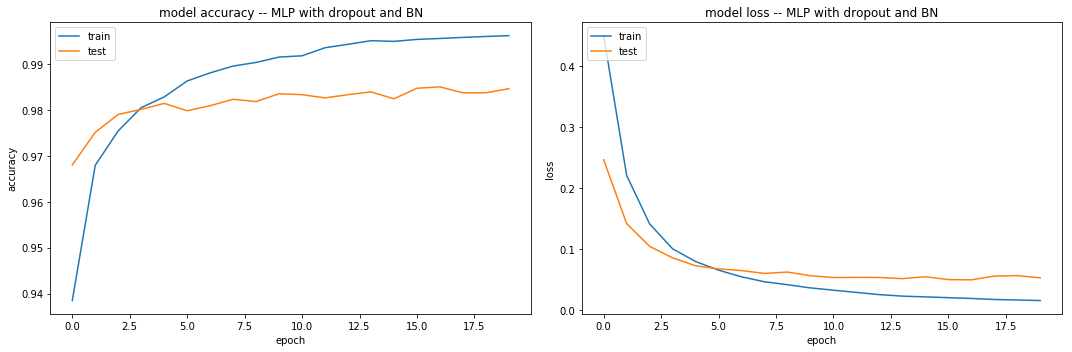

In [8]:
plt.figure(figsize=(15, 5)) 
# Plot history for accuracy
plt.subplot(121)
plt.plot(history_dropout.history['acc'])
plt.plot(history_dropout.history['val_acc'])
plt.title('model accuracy -- MLP with dropout and BN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
plt.subplot(122)
plt.plot(history_dropout.history['loss'])
plt.plot(history_dropout.history['val_loss'])
plt.title('model loss -- MLP with dropout and BN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()

### D'autre algorithmes d'optimisation

Nous utilisons un optimiseur appelé RMSprop, qui consiste en une descente de gradient avec quelques termes supplémentaires impliqués. Il y a cependant d'autres possibilités. Adam, un autre optimiseur basé sur la descente de gradient, a récemment été introduit et a montré de très bons résultats en pratique.

De bonnes comparaisons de différents optimiseurs sont disponibles [ici] (http://ruder.io/optimizing-gradient-descent/) et [ici] (https://3dbabove.com/2017/11/14/optimizationalgorithms/).

In [ ]:
from keras.optimizers import adam

# Parameters
batch_size = 128
epochs = 20

# Specify model
model = Sequential()

model.add(Dense(512, input_dim=784, init="uniform"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))

model.add(Dense(n_classes, init="uniform"))
model.add(BatchNormalization())
model.add(Activation("softmax"))

# Print model and compile it
model.summary()
model.compile(loss="categorical_crossentropy",
              optimizer=adam(),
              metrics=["accuracy"])

# Perform fit
history_adam = model.fit(X_train, y_train_b,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test_b))


# Print results
score = model.evaluate(X_test, y_test_b, verbose=0)
print('Test loss/accuracy: %g, %g' % (score[0], score[1]))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=784, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
_________________________________________________________________
batch_normalization_4 (Batch (None, 10)                40        
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total para

In [ ]:
plt.figure(figsize=(15, 5)) 
# Plot history for accuracy
plt.subplot(121)
plt.plot(history_adam.history['acc'])
plt.plot(history_adam.history['val_acc'])
plt.title('model accuracy -- MLP using Adam')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
plt.subplot(122)
plt.plot(history_adam.history['loss'])
plt.plot(history_adam.history['val_loss'])
plt.title('model loss -- MLP using Adam')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()

### Rajouter des couches...

Et si nous ajoutions simplement une autre couche? Disons que c'est identique au premier (bien que cela puisse être autre  chose - les possibilités ici sont infinies!)

In [ ]:
# Parameters
batch_size = 128
epochs = 20

# Specify model
model = Sequential()

model.add(Dense(512, input_dim=784, init="uniform"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))

model.add(Dense(512, input_dim=784, init="uniform"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))

model.add(Dense(n_classes, init="uniform"))
model.add(BatchNormalization())
model.add(Activation("softmax"))

# Print model and compile it
model.summary()
model.compile(loss="categorical_crossentropy",
              optimizer=adam(),
              metrics=["accuracy"])

# Perform fit
history_onemorelayer = model.fit(X_train, y_train_b,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=False,
                    validation_data=(X_test, y_test_b))


# Print results
score = model.evaluate(X_test, y_test_b, verbose=0)
print('Test loss/accuracy: %g, %g' % (score[0], score[1]))

In [ ]:
plt.figure(figsize=(15, 5)) 
# Plot history for accuracy
plt.subplot(121)
plt.plot(history_onemorelayer.history['acc'])
plt.plot(history_onemorelayer.history['val_acc'])
plt.title('model accuracy -- MLP with three layers')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
plt.subplot(122)
plt.plot(history_onemorelayer.history['loss'])
plt.plot(history_onemorelayer.history['val_loss'])
plt.title('model loss -- MLP with three layers')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()

Comme nous pouvons le constater, il est très difficile de dépasser la précision de test de 98%. Pour ce faire, nous devrons examiner des modèles encore plus compliqués - plus précisément, des couches autres que celle dense. Nous ferons cela lors du prochain cours!